In [2]:
%matplotlib inline

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30, n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

Decision tree accuracy: 0.7


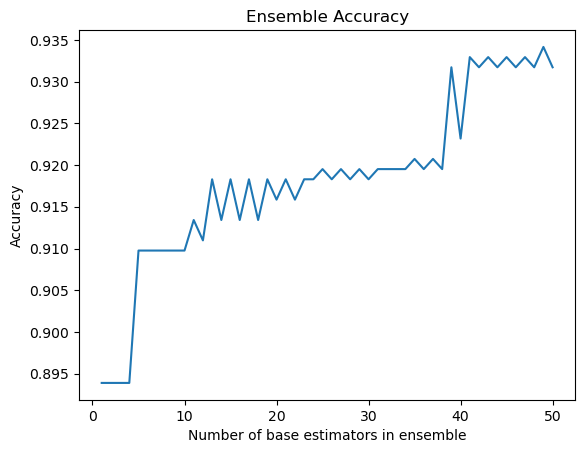

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import warnings

# 忽略 FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# 指定所有列为字符串类型，避免混合类型警告，并使用 low_memory=False
df = pd.read_csv('./ad.data', header=None, dtype=str, low_memory=False)

# 特征和标签列的设置
explanatory_variable_columns = set(df.columns.values)
explanatory_variable_columns.remove(len(df.columns.values)-1)
response_variable_column = df[len(df.columns.values)-1]  # 最后一列描述类

# 将标签转换为二进制
y = [1 if e == 'ad.' else 0 for e in response_variable_column]
X = df[list(explanatory_variable_columns)].copy()

# 将非数值数据替换为 -1，并将所有列转换为浮点数
X = X.apply(pd.to_numeric, errors='coerce').fillna(-1)

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 初始化 AdaBoostClassifier，显式指定使用 SAMME 算法
clf = AdaBoostClassifier(n_estimators=50, random_state=11, algorithm='SAMME')
clf.fit(X_train, y_train)

# 记录每个阶段的准确性
staged_scores = [accuracy for accuracy in clf.staged_score(X_test, y_test)]

# 绘制结果
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.plot(range(1, len(staged_scores) + 1), staged_scores)
plt.show()

